In [1]:
import pandas as pd
from sqlalchemy import create_engine
import statistics

database_path = 'storage.sqlite'

engine = create_engine(f'sqlite:///{database_path}')
con = engine.connect()

df_gamedata = pd.read_sql('SELECT * FROM gamedata', con)
df_gamedata_original = pd.read_sql('SELECT * FROM gamedata', con)

con.close()

df = pd.read_csv('PATCH_13.1_9500_GAMES.csv')

df_gamedata['summonerName'] = df_gamedata['summonerName'].replace({
    'The Life of Andy': 'Andy',
    'Fer Sharks': 'Jackson',
    'Diet Smite': 'Kori',
    'Santa kums 2nite': 'Kori',
    'B1ng Chillin': 'Kori',
    'Brony Hole': 'Luke',
    'cloaca buss down': 'Rob',
    'glocktobussy': 'Tonnie',
    'BeaIs': 'Beals',
    'Large Ski11 Gap': 'Tyler',
    'Net n Yahoo': 'Tyler',
    'Sp4nK1n M0nK3y5': 'Tyler',
    'SmokeDopeNotCope': 'Tyler',
    'HTXpanda': 'Jess',
    'NickBlumer': 'Nick B.',
    'G4ytr0x': 'Moo',
    'M4SHALLAH': 'Moo',
    'the scouts chode': 'Moo',
    'For Gun': 'Moo',
    'ezcyabye': 'Moo',
    'Anonymous Lemur': 'Nick D.',
    'Despp': 'Desp',
    'ducks on pond': 'Anthony',
    'Kinga': 'Kinga',
    'YoungOcelot': 'Milroy',
    'ScottSucks':'Furb',
    'SprightReamicks': 'Franklin'
})

df_gamedata.loc[df_gamedata['summonerName'] == 'Jess', 'individualPosition'] = 'UTILITY'
df_gamedata.loc[df_gamedata['championName'] == 'Twitch', 'individualPosition'] = 'BOTTOM'
df_gamedata.loc[df_gamedata['championName'] == 'Nautilus', 'individualPosition'] = 'UTILITY'

df_gamedata['gameDuration'] = df_gamedata['gameDuration']/60
df_gamedata['kills_per_min'] = df_gamedata['kills']/df_gamedata['gameDuration']
df_gamedata['deaths_per_min'] = df_gamedata['deaths']/df_gamedata['gameDuration']
df_gamedata['assists_per_min'] = df_gamedata['assists']/df_gamedata['gameDuration']

df_gamedata_total_team_kills = df_gamedata.groupby(['gameId', 'teamId'])['kills'].sum()
df_gamedata = pd.merge(df_gamedata, df_gamedata_total_team_kills, on = ['gameId', 'teamId'])
df_gamedata = df_gamedata.rename(columns = {
    'kills_x': 'kills',
    'kills_y': 'team_kills',
})
df_gamedata['kill_participation'] = (df_gamedata['kills'] + df_gamedata['assists']) / (df_gamedata['team_kills'])

df_gamedata['cs'] = df_gamedata['totalMinionsKilled'] + df_gamedata['neutralMinionsKilled']
df_gamedata['cs_per_min'] = df_gamedata['cs'] / df_gamedata['gameDuration']
df_gamedata['gold_per_min'] = df_gamedata['goldEarned'] / df_gamedata['gameDuration']
df_gamedata['damage_per_min'] = df_gamedata['totalDamageDealtToChampions'] / df_gamedata['gameDuration']
df_gamedata['damage_taken_per_min'] = df_gamedata['totalDamageTaken'] / df_gamedata['gameDuration']
df_gamedata['damage_healed_per_min'] = df_gamedata['totalHeal'] / df_gamedata['gameDuration']
df_gamedata['heal_and_shielding_per_min'] = (df_gamedata['totalHealsOnTeammates'] + df_gamedata['totalDamageShieldedOnTeammates']) / df_gamedata['gameDuration']
df_gamedata['turret_plates_taken'] = df_gamedata['turretPlatesTaken']
df_gamedata['vision_score_per_min'] = df_gamedata['visionScore'] / df_gamedata['gameDuration']
df_gamedata['wards_placed_per_min'] = df_gamedata['wardsPlaced'] / df_gamedata['gameDuration']
df_gamedata['ward_takedowns_per_min'] = df_gamedata['wardsKilled'] / df_gamedata['gameDuration']
df_gamedata['control_wards_placed_per_min'] = df_gamedata['visionWardsBoughtInGame'] / df_gamedata['gameDuration']
df_gamedata['dragons'] = df_gamedata['dragonTakedowns']
df_gamedata['epic_monster_steals'] = df_gamedata['epicMonsterSteals']

df_gamedata = df_gamedata.rename(columns = {
    'championName':'champion',
    'individualPosition': 'position',
    'gameDuration':'game_duration',
    'win': 'result'
})

df_gamedata = df_gamedata[['gameId', 'summonerName', 'champion', 'position', 'result',
                           'kills_per_min', 'deaths_per_min', 'assists_per_min', 'kill_participation', 'cs_per_min', 'gold_per_min', 'damage_per_min', 'turret_plates_taken', 'vision_score_per_min',
                           'assists_per_min', 'deaths_per_min', 'kill_participation', 'heal_and_shielding_per_min', 'vision_score_per_min', 'wards_placed_per_min', 'ward_takedowns_per_min', 'control_wards_placed_per_min',
                           'kills_per_min', 'deaths_per_min', 'assists_per_min', 'kill_participation', 'cs_per_min', 'gold_per_min', 'damage_per_min', 'vision_score_per_min', 'epic_monster_steals', 'dragons']]
data_list = df_gamedata.values.tolist()

df = df.loc[df['game_duration'] > 15]
df['kills_per_min'] = df['kills']/df['game_duration']
df['deaths_per_min'] = df['deaths']/df['game_duration']
df['assists_per_min'] = df['assists']/df['game_duration']
df['damage_taken_per_min'] = df['damage_taken']/df['game_duration']
df['damage_dealt_to_objectives_per_min'] = df['damage_dealt_to_objectives']/df['game_duration']
df['damage_healed_per_min'] = df['damage_healed']/df['game_duration']
df['heal_and_shielding_per_min'] = df['heal_and_shielding']/df['game_duration']
df['wards_placed_per_min'] = df['wards_placed']/df['game_duration']
df['ward_takedowns_per_min'] = df['ward_takedowns']/df['game_duration']
df['control_wards_placed_per_min'] = df['control_wards_placed']/df['game_duration']
df['dragons'] = df['dragon_takedowns']


df = df[['champion', 'position', 'game_duration', 'kills_per_min', 'deaths_per_min', 'assists_per_min', 'kill_participation', 'cs_per_min', 'gold_per_min', 'damage_per_min', 
         'turret_plates_taken', 'epic_monster_steals', 'dragons', 'heal_and_shielding_per_min', 'vision_score_per_min', 'wards_placed_per_min', 'ward_takedowns_per_min', 'control_wards_placed_per_min']]

avg_z_score_list = []
def avgZScore(gamedata_row):
    
    df2 = df.loc[df['champion'] == gamedata_row[2]]
    df3 = df2.loc[df2['position'] == gamedata_row[3]]
    
    stat_name_list = ['kills_per_min', 'deaths_per_min', 'assists_per_min', 'kill_participation', 'cs_per_min', 'gold_per_min', 'damage_per_min', 'turret_plates_taken', 'vision_score_per_min',
                      'assists_per_min', 'deaths_per_min', 'kill_participation', 'heal_and_shielding_per_min', 'vision_score_per_min', 'wards_placed_per_min', 'ward_takedowns_per_min', 'control_wards_placed_per_min',
                      'kills_per_min', 'deaths_per_min', 'assists_per_min', 'kill_participation', 'cs_per_min', 'gold_per_min', 'damage_per_min', 'vision_score_per_min', 'epic_monster_steals', 'dragons']
    
    if gamedata_row[3] == 'UTILITY':
        stat_name_list = stat_name_list[9:17]
        stat_list = gamedata_row[14:22]
    elif gamedata_row[3] == 'JUNGLE':
        stat_name_list = stat_name_list[17:]
        stat_list = gamedata_row[22:]
    else:
        stat_name_list = stat_name_list[0:9]
        stat_list = gamedata_row[5:14]

    z_score_list = []
    for i in range(len(stat_name_list)):
        stat = df3[stat_name_list[i]]
        mean = statistics.mean(stat)
        stdev = statistics.stdev(stat)
        if stdev == 0:
            z_score = 0
        else:
            z_score = (stat_list[i] - mean) / (stdev)
        z_score_list.append(z_score)

    z_score_list[1] = -1*z_score_list[1]
    
    avg_z_score = sum(z_score_list) / len(z_score_list)
    avg_z_score_list.append(avg_z_score)
    
    return

for i in range(len(data_list)):
    avgZScore(data_list[i])

ornn_jung_z_scores = [-1.4186856589353605, -0.006640600095843733, -1.4510894602374265, 0.20306949409054514, -1.2514645851171116, -1.963172460333005, -1.6075478620420376, 1.1456297393855601, -0.29067731015395804, -1.5064857957890396]
ornn_avg_z_score = sum(ornn_jung_z_scores) / len(ornn_jung_z_scores)
avg_z_score_list[519] = ornn_avg_z_score

df_gamedata['toxic_score'] = avg_z_score_list
df_gamedata = df_gamedata[['gameId', 'summonerName', 'champion', 'position', 'result', 'toxic_score']]

df_top = df_gamedata.loc[df_gamedata['position'] == 'TOP']
df_jung = df_gamedata.loc[df_gamedata['position'] == 'JUNGLE']
df_mid = df_gamedata.loc[df_gamedata['position'] == 'MIDDLE']
df_bot = df_gamedata.loc[df_gamedata['position'] == 'BOTTOM']
df_supp = df_gamedata.loc[df_gamedata['position'] == 'UTILITY']

top_avg_z_score_list = df_top['toxic_score'].tolist()
scaled_top_avg_z_score_list = []
for i in range(len(top_avg_z_score_list)):
    minimum = df_top['toxic_score'].min() - 0.25
    maximum = df_top['toxic_score'].max() + 0.25
    shifted_avg_z_score = top_avg_z_score_list[i] - minimum
    scaled_avg_z_score = (shifted_avg_z_score)/(maximum - minimum)*10
    scaled_top_avg_z_score_list.append(scaled_avg_z_score)
df_top['toxic_score'] = scaled_top_avg_z_score_list

jung_avg_z_score_list = df_jung['toxic_score'].tolist()
scaled_jung_avg_z_score_list = []
for i in range(len(jung_avg_z_score_list)):
    minimum = df_jung['toxic_score'].min() - 0.25
    maximum = df_jung['toxic_score'].max() + 0.25
    shifted_avg_z_score = jung_avg_z_score_list[i] - minimum
    scaled_avg_z_score = (shifted_avg_z_score)/(maximum - minimum)*10
    scaled_jung_avg_z_score_list.append(scaled_avg_z_score)
df_jung['toxic_score'] = scaled_jung_avg_z_score_list

mid_avg_z_score_list = df_mid['toxic_score'].tolist()
scaled_mid_avg_z_score_list = []
for i in range(len(mid_avg_z_score_list)):
    minimum = df_mid['toxic_score'].min() - 0.25
    maximum = df_mid['toxic_score'].max() + 0.25
    shifted_avg_z_score = mid_avg_z_score_list[i] - minimum
    scaled_avg_z_score = (shifted_avg_z_score)/(maximum - minimum)*10
    scaled_mid_avg_z_score_list.append(scaled_avg_z_score)
df_mid['toxic_score'] = scaled_mid_avg_z_score_list

bot_avg_z_score_list = df_bot['toxic_score'].tolist()
scaled_bot_avg_z_score_list = []
for i in range(len(bot_avg_z_score_list)):
    minimum = df_bot['toxic_score'].min() - 0.25
    maximum = df_bot['toxic_score'].max() + 0.25
    shifted_avg_z_score = bot_avg_z_score_list[i] - minimum
    scaled_avg_z_score = (shifted_avg_z_score)/(maximum - minimum)*10
    scaled_bot_avg_z_score_list.append(scaled_avg_z_score)
df_bot['toxic_score'] = scaled_bot_avg_z_score_list

supp_avg_z_score_list = df_supp['toxic_score'].tolist()
scaled_supp_avg_z_score_list = []
for i in range(len(supp_avg_z_score_list)):
    minimum = df_supp['toxic_score'].min() - 0.25
    maximum = df_supp['toxic_score'].max() + 0.25
    shifted_avg_z_score = supp_avg_z_score_list[i] - minimum
    scaled_avg_z_score = (shifted_avg_z_score)/(maximum - minimum)*10
    scaled_supp_avg_z_score_list.append(scaled_avg_z_score)
df_supp['toxic_score'] = scaled_supp_avg_z_score_list

df_gamedata = pd.concat([df_top, df_jung, df_mid, df_bot, df_supp])

C:\Users\akgso\AppData\Local\Temp\ipykernel_8036\989437667.py:171: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top['toxic_score'] = scaled_top_avg_z_score_list
C:\Users\akgso\AppData\Local\Temp\ipykernel_8036\989437667.py:181: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jung['toxic_score'] = scaled_jung_avg_z_score_list
C:\Users\akgso\AppData\Local\Temp\ipykernel_8036\989437667.py:191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

4.244958930843344
4.502335113091179
4.857523438271436
4.38992811894403
5.183510504579615


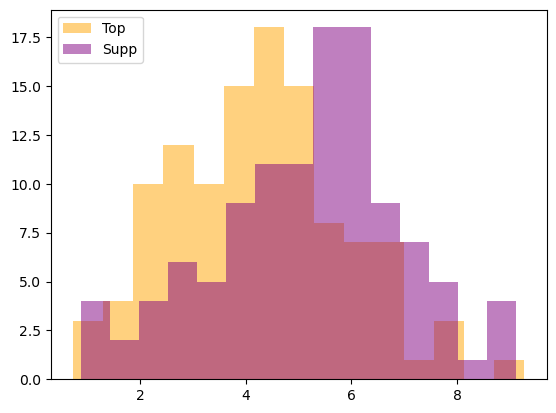

In [2]:
import matplotlib.pyplot as plt

plt.hist(df_top['toxic_score'], bins = 15, alpha = 0.5, color = 'orange', label='Top')
#plt.hist(df_jung['toxic_score'], bins = 15, alpha = 0.5, color = 'green', label='Jung')
#plt.hist(df_mid['toxic_score'], bins = 15, alpha = 0.5, color = 'blue', label='Mid')
#plt.hist(df_bot['toxic_score'], bins = 15, alpha = 0.5, color = 'red', label='Bot')
plt.hist(df_supp['toxic_score'], bins = 15, alpha = 0.5, color = 'purple', label='Supp')

plt.legend(loc='upper left')

print(df_top['toxic_score'].mean())
print(df_jung['toxic_score'].mean())
print(df_mid['toxic_score'].mean())
print(df_bot['toxic_score'].mean())
print(df_supp['toxic_score'].mean())

5.512250447574388
3.759051994717454


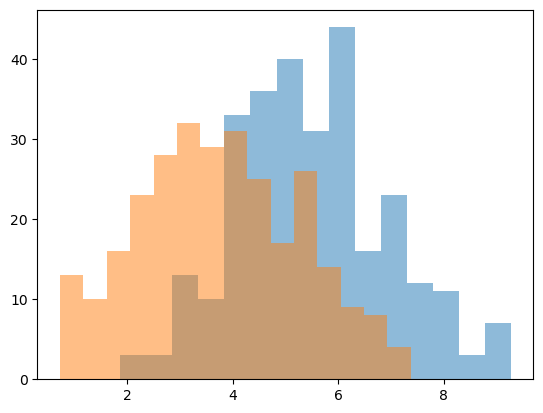

In [3]:
df_win = df_gamedata.loc[df_gamedata['result'] == '1']
df_loss = df_gamedata.loc[df_gamedata['result'] == '0']

plt.hist(df_win['toxic_score'], bins = 15, alpha = 0.5)
plt.hist(df_loss['toxic_score'], bins = 15, alpha = 0.5);

print(df_win['toxic_score'].mean())
print(df_loss['toxic_score'].mean())

In [4]:
df_win2 = df_win[['gameId', 'toxic_score']].groupby(by = ['gameId']).sum(['toxic_score']).sort_values(by = 'toxic_score', ascending = False)
df_loss2 = df_loss[['gameId', 'toxic_score']].groupby(by = ['gameId']).sum(['toxic_score']).sort_values(by = 'toxic_score', ascending = False)
df_teamTS = pd.merge(df_win2, df_loss2, on = 'gameId')
df_teamTS['toxic_score_x'] = df_teamTS['toxic_score_x']/5
df_teamTS['toxic_score_y'] = df_teamTS['toxic_score_y']/5
df_teamTS = df_teamTS.rename(columns = {
    'toxic_score_x': 'winning_team_avg_toxic_score',
    'toxic_score_y': 'losing_team_avg_toxic_score'
})
df_teamTS['diff'] = df_teamTS['winning_team_avg_toxic_score'] - df_teamTS['losing_team_avg_toxic_score']
df_teamTS[['diff']].sort_values(by = 'diff', ascending = False)

,diff
gameId,
4521767469,4.469700
4439408609,3.924238
4571561716,3.663243
4515152757,3.472848
4459118495,3.051927
4499796039,3.050215
4565052483,3.008212
4521911672,2.923297
4524698522,2.859957


In [5]:
df_teamTS[['diff']].sort_values(by = 'diff')

,diff
gameId,
4499891862,-1.295994
4505391396,-0.739591
4521856346,-0.585964
4438988683,-0.571345
4455711721,-0.280364
4499841033,0.137096
4503893875,0.164172
4515262943,0.264450
4498234766,0.813567
